# Setting up our envionment

In [2]:
# if already have run evironment setup, then for cleanup run this
!rm -rf Monk_Object_Detection

In [3]:
#our fork of the Tessellate-Imaging image detection library
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 3747, done.
remote: Total 3747 (delta 0), reused 0 (delta 0), pack-reused 3747
Receiving objects: 100% (3747/3747), 132.20 MiB | 37.75 MiB/s, done.
Resolving deltas: 100% (800/800), done.
Checking out files: 100% (4032/4032), done.


In [4]:
# Set up library requirments
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

     |████████████████████████████████| 827.8MB 15kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-cp36-none-any.whl size=17452 sha256=4e24965252afaed0499010d507a7bf9372e829913f09a4ca5524fd79cdcb5711
  Stored in directory: /root/.cache/pip/wheels/62/4f/a3/afd4a68f5add45a668c14efa53b64d5cffb2be6bacf993c151
Successfully built dicttoxml


In [5]:
#fixed version of tqdm output for Colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
#IGNORE restart runtime warning, it is indeed installed
#missing a few extra packages that we will need later! 
!pip install efficientnet_pytorch
!pip install tensorboardX

     \ 430kB 36.2MB/s
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47867 sha256=1ce0207b128019fe9574bf882cb605b360da314afe641f58898e0032427c33d4
  Stored in directory: /tmp/pip-ephem-wheel-cache-3f_o6per/wheels/41/18/ee/d5dd158441b27965855b1bbae03fa2d8a91fe645c01b419896
Successfully built tqdm
ERROR: spacy 2.2.4 has requirement tqdm<5.0.0,>=4.38.0, but you'll have tqdm 4.28.1 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement tqdm>=4.36.1, but you'll have tqdm 4.28.1 which is incompatible.
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.0-cp36-none-any.whl size=16030 sha256=a239ed07c3814c1fcd2d31956c314948a41f822be9239a38920376b724354c57
  Stored in directory: /root/.cache/pip/wheels/e9/c6/e1/7a808b26406239712cfce4b5ceeb67d9513ae32aa4b31445c6
Successfully built efficientnet-pytorch
     |██████████████████

# Let's get some data! 

The best part about Roboflow is the efficient management of your datasets. [Upload you dataset](roboflow.ai) and you will recieve a fresh curl code to ouput it in whatever augmented and annotated format you need. 

In [6]:
#fresh curl courtesy of roboflow.ai, outputing our dataset in Coco Json format

##THIS CELL NEEDS CHANGED##

!curl -L https://public.roboflow.com/ds/f2ZhSlYoKS?key=8c9bH6WNtA > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/1339_jpg.rf.312ee79ec01d001d736a48bbe240390a.jpg  
 extracting: train/2713_jpg.rf.3214920d1986f284afba69f0a0e0698b.jpg  
 extracting: train/609_jpg.rf.32803d9828f5ee48533818bdb66cffd2.jpg  
 extracting: train/953_jpg.rf.3237a6da506b0e14519398ac5154df88.jpg  
 extracting: train/536_jpg.rf.32447c4f1a00e8b7f5704ccb90e9bf2c.jpg  
 extracting: train/695_jpg.rf.3280f0e6af6a30065fa17b10d31216e3.jpg  
 extracting: train/3395_jpg.rf.328a102b4ac65a32acedaf54a547c580.jpg  
 extracting: train/399_jpg.rf.327081d72cb2310d856c8b12887b5d57.jpg  
 extracting: train/598_jpg.rf.32811e5c5883b63779507b987339832a.jpg  
 extracting: train/1999_jpg.rf.323ede90269037ac11a963a28da5d7dc.jpg  
 extracting: train/2688_jpg.rf.32723065ddb6941672e44b319328f85c.jpg  
 extracting: train/415_jpg.rf.32c21ed65f4e4b91fb1a186bf6d8b26b.jpg  
 extracting: train/2343_jpg.rf.32b08b67e8824f3ac03a5e75eecc2292.jpg  
 extracting: train/3298_jpg.rf.32ab1b582dba1af

In [7]:
#let's take a look at our directory
#notice the data came down in train, valid, test, splits - this is pre set during the dataset upload process
%ls

drive/                  README.dataset.txt   sample_data/  valid/
Monk_Object_Detection/  README.roboflow.txt  train/


In [8]:
#let's take a peak in train
#jpg images and some coco json annotations
%ls train

Streaming output truncated to the last 5000 lines.
1000_jpg.rf.964df9125525132eb6971e45565d5667.jpg
1001_jpg.rf.e188911ce81fa54eef2ba0aa100e029a.jpg
1002_jpg.rf.a26bfa4d339819410e966930f2682dd2.jpg
1003_jpg.rf.ea875e89ca2001940263189efee3db6c.jpg
1004_jpg.rf.b06d6bd727318123bc8d12323c5dd150.jpg
1005_jpg.rf.ca49eed1b800f1a9a156f97726f9cdd9.jpg
1006_jpg.rf.50e8f328ae74b1e5380c7719caaac963.jpg
1007_jpg.rf.767a64964e730a80f493fc6731a15764.jpg
1008_jpg.rf.1c43545d2a7a84b62c32154ae54b9a5d.jpg
1009_jpg.rf.125a771ca50bd9e6f3ae2427e6ff8c30.jpg
100_jpg.rf.ed2c4daf0001cc2de86df344c94b7d78.jpg
1010_jpg.rf.b8f45306a2c87193992575a5e2bbae17.jpg
1011_jpg.rf.00954dbf68a3037f446cabdc9fd8f97d.jpg
1012_jpg.rf.c33f88de207abd9ca5e48709d771d1bd.jpg
1013_jpg.rf.3c9509d317e7615a3fe88766df2cedfd.jpg
1014_jpg.rf.027a26f996ab3b86f65fcda8e84fd200.jpg
1015_jpg.rf.3685b6bc93a91fafcbb4abb6f3db7dcc.jpg
1016_jpg.rf.b774df9e2850527e02946b9ae1c22346.jpg
1017_jpg.rf.ce65f88203414e0ec9117ba0a3b93c5e.jpg
1018_jpg.rf.ad2ae57

In [9]:
#let's take a peek at the annotations
#class categories, and bounding boxes are provided for our train set
#%pycat train/_annotations.coco.json

In [10]:
#in the next three cells, we move the data into a structure that the image detection library will be expecting
#but no file data manipulation is necessary
#images can also be segmented into class folders, but we combine all classes here
!mkdir Fruits
!mkdir Fruits/annotations
!mkdir Fruits/Annotations
!mkdir Fruits/Images

In [11]:
%cp train/_annotations.coco.json Fruits/annotations/instances_Images.json

In [12]:
%cp train/*.jpg Fruits/Images/

# Training

In this section we set up the efficientDet-d0 model from backbone and train to our custom case

In [13]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [14]:
from train_detector import Detector

In [15]:
gtf = Detector();

In [16]:
#directs the model towards file structure
root_dir = "./";
coco_dir = "Fruits";
img_dir = "./";
set_dir = "Images";

In [17]:
#smells like some free compute from Colab, nice
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=8, image_size=512, use_gpu=True)

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


In [18]:
gtf.Model();

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth



Loaded pretrained weights for efficientnet-b0


In [19]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, es_min_delta=0.0, es_patience=0)

In [20]:
!ls Fruits/Images

0_jpg.rf.797c3b5d7c158e61b6faacb71e4d832d.jpg
1000_jpg.rf.964df9125525132eb6971e45565d5667.jpg
1001_jpg.rf.e188911ce81fa54eef2ba0aa100e029a.jpg
1002_jpg.rf.a26bfa4d339819410e966930f2682dd2.jpg
1003_jpg.rf.ea875e89ca2001940263189efee3db6c.jpg
1004_jpg.rf.b06d6bd727318123bc8d12323c5dd150.jpg
1005_jpg.rf.ca49eed1b800f1a9a156f97726f9cdd9.jpg
1006_jpg.rf.50e8f328ae74b1e5380c7719caaac963.jpg
1007_jpg.rf.767a64964e730a80f493fc6731a15764.jpg
1008_jpg.rf.1c43545d2a7a84b62c32154ae54b9a5d.jpg
1009_jpg.rf.125a771ca50bd9e6f3ae2427e6ff8c30.jpg
100_jpg.rf.ed2c4daf0001cc2de86df344c94b7d78.jpg
1010_jpg.rf.b8f45306a2c87193992575a5e2bbae17.jpg
1011_jpg.rf.00954dbf68a3037f446cabdc9fd8f97d.jpg
1012_jpg.rf.c33f88de207abd9ca5e48709d771d1bd.jpg
1013_jpg.rf.3c9509d317e7615a3fe88766df2cedfd.jpg
1014_jpg.rf.027a26f996ab3b86f65fcda8e84fd200.jpg
1015_jpg.rf.3685b6bc93a91fafcbb4abb6f3db7dcc.jpg
1016_jpg.rf.b774df9e2850527e02946b9ae1c22346.jpg
1017_jpg.rf.ce65f88203414e0ec9117ba0a3b93c5e.jpg
1018_jpg.rf.ad2ae57a8778

In [22]:
%%time
gtf.Train(num_epochs=50, model_output_dir="trained/");

Monk_Object_Detection/4_efficientdet/lib/src/model.py:251: TracerWarning: Converting a tensor to a Python index might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if len(inputs) == 2:
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:84: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  image_shape = np.array(image_shape)
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:96: TracerWarning: torch.from_numpy results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this fu

/usr/local/lib/python3.6/dist-packages/torch/onnx/symbolic_opset9.py:2332: UserWarning: Exporting aten::index operator with indices of type Byte. Only 1-D indices are supported. In any other case, this will produce an incorrect ONNX graph.
  warnings.warn("Exporting aten::index operator with indices of type Byte. "
/usr/local/lib/python3.6/dist-packages/torch/onnx/symbolic_opset9.py:588: UserWarning: This model contains a squeeze operation on dimension 1 on an input with unknown shape. Note that if the size of dimension 1 of the input is not 1, the ONNX model will return an error. Opset version 11 supports squeezing on non-singleton dimensions, it is recommended to export this model using opset version 11 or higher.
  "version 11 or higher.")


CPU times: user 4h 24min 58s, sys: 55min 47s, total: 5h 20min 46s
Wall time: 5h 31min 15s


# Inference

In [23]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from infer_detector import Infer

In [ ]:
gtf = Infer();

In [ ]:
#our trained model weights are in here in onxx format
gtf.Model(model_dir="trained/")

In [ ]:
#extract class list from our annotations
import json
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])

In [ ]:
class_list

In [ ]:
%ls valid

In [ ]:
%%time
test_images = [f for f in os.listdir('valid') if f.endswith('.jpg')]
import random
img_path = "valid/" + random.choice(test_images);
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

In [ ]:
from IPython.display import Image
Image(filename='output.jpg') 

# Export Trained Weights

In [24]:
#export trained model
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
%mkdir trained_export
%cp ./trained/signatrix_efficientdet_coco.onnx ./trained_export/signatrix_efficientdet_coco_$(date +%F-%H:%M).onnx
%cp ./trained/signatrix_efficientdet_coco.pth ./trained_export/signatrix_efficientdet_coco_$(date +%F-%H:%M).pth
%mv ./trained_export/* /content/drive/My\ Drive/

# Reloading Trained Weights after Export

Imagine you have exported your trained model and would like to reaccess it later. This portion of the notebook picks up the trained model and starts at inference


In [26]:
#export trained model
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
#our fork of the Tessellate-Imaging image detection library
!rm -rf Monk_Object_Detection
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 3747, done.
remote: Total 3747 (delta 0), reused 0 (delta 0), pack-reused 3747
Receiving objects: 100% (3747/3747), 132.20 MiB | 37.30 MiB/s, done.
Resolving deltas: 100% (800/800), done.
Checking out files: 100% (4032/4032), done.


In [28]:
# For colab use the command below
# Set up library requirments
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

#fixed version of tqdm output for Colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
#IGNORE restart runtime warning, it is indeed installed
#missing a few extra packages that we will need later! 
!pip install efficientnet_pytorch
!pip install tensorboardX

  Using cached https://github.com/chengs/tqdm/archive/colab.zip
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47867 sha256=2e56b57bee63b3bf9a6b31e8bc41b85db25e31636cd782074b36e86cf2d21bf0
  Stored in directory: /tmp/pip-ephem-wheel-cache-cxafu7wb/wheels/41/18/ee/d5dd158441b27965855b1bbae03fa2d8a91fe645c01b419896
Successfully built tqdm
ERROR: spacy 2.2.4 has requirement tqdm<5.0.0,>=4.38.0, but you'll have tqdm 4.28.1 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement tqdm>=4.36.1, but you'll have tqdm 4.28.1 which is incompatible.
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1


In [29]:
#recover trained weights
!mkdir '/trained'
#note these are old weights that I didn't train for too long
!cp '/content/drive/My Drive/signatrix_efficientdet_coco_2020-12-13-15:56.onnx' '/trained/signatrix_efficientdet_coco.onnx'
!cp '/content/drive/My Drive/signatrix_efficientdet_coco_2020-12-13-15:56.pth' '/trained/signatrix_efficientdet_coco.pth'

In [30]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [31]:
from infer_detector import Infer
gtf = Infer();

In [32]:
#our trained model weights are in here in onxx format
gtf.Model(model_dir="/trained")

In [33]:
#download some test data
!curl -L https://public.roboflow.com/ds/f2ZhSlYoKS?key=8c9bH6WNtA | jar -x

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   887  100   887    0     0   1394      0 --:--:-- --:--:-- --:--:--  1394
 99  205M   99  204M    0     0  53.8M      0  0:00:03  0:00:03 --:--:-- 71.5M
curl: (23) Failed writing body (1385 != 8192)


In [34]:
!ls valid

0_jpg.rf.d5f2c9b0e31a05ab01aaafd638814884.jpg
100_jpg.rf.b0de54fad49a90e2e765b8f141607ead.jpg
101_jpg.rf.ab03c60188530073b5209ce3f2950f93.jpg
102_jpg.rf.15518b042a1b422def03306b1cead3f0.jpg
103_jpg.rf.8e8bde33b7d45c6fb89a857639ff4042.jpg
104_jpg.rf.669863c67bdac6fc7c6db2444e266bc4.jpg
105_jpg.rf.c8cf2ef871e7c2f7445eab02749ccb2f.jpg
106_jpg.rf.df1782c3d0a156be221534257f7f975b.jpg
107_jpg.rf.1a81aa1779d9171e4d76606271f1f955.jpg
108_jpg.rf.ab92e03a7f7e1e7555a28ce2bf5b61b8.jpg
109_jpg.rf.6f9e8edc94727d58466ac10a7d4fb91b.jpg
10_jpg.rf.add50f0220c549260a62c1e8d8f3e945.jpg
110_jpg.rf.2507cb78e1587dcc412c11c5ba2938f6.jpg
111_jpg.rf.2b8c34fb0b9a7a3aa5032d2fabf91ffd.jpg
112_jpg.rf.90ca8434a55eb8a4be957b8fa8cd3235.jpg
113_jpg.rf.b16c5c5989f8f81f9fba9c14d38a4dd3.jpg
114_jpg.rf.aea0a1538f41ab5bb5fbeefbb52b20c5.jpg
115_jpg.rf.88efcf7acd82744d894b351df0373d3a.jpg
116_jpg.rf.495ce19745261edd5394e57e06dc7f17.jpg
117_jpg.rf.5d5fe2d00443d5d69258e78e017d48b0.jpg
118_jpg.rf.91ffd8e38e198bbe8c74a85377030c01

In [35]:
#extract class list from our annotations
#in your application you will probably already have this saved
import json
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])

In [36]:
class_list

['Fruits',
 'Apple',
 'Apricot',
 'Avocado',
 'Banana',
 'Beetroot',
 'Blueberry',
 'Cactus',
 'Cantaloupe',
 'Carambula',
 'Cauliflower',
 'Cherry',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Dates',
 'Eggplant',
 'Ginger',
 'Granadilla',
 'Grape',
 'Grapefruit',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Limes',
 'Lychee',
 'Mandarine',
 'Mango',
 'Mangostan',
 'Maracuja',
 'Melon',
 'Mulberry',
 'Nectarine',
 'Nut',
 'Onion',
 'Orange',
 'Papaya',
 'Passion',
 'Peach',
 'Pear',
 'Pepino',
 'Pepper',
 'Physalis',
 'Pineapple',
 'Pitahaya',
 'Plum',
 'Pomegranate',
 'Pomelo',
 'Potato',
 'Quince',
 'Rambutan',
 'Raspberry',
 'Redcurrant',
 'Salak',
 'Strawberry',
 'Tamarillo',
 'Tangelo',
 'Tomato',
 'Walnut']

In [37]:
%%time
#bang!
img_path = "valid/78_jpg.rf.0029035f1f3486108af0338adab7106c.jpg";
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

Done. (0.053s)
CPU times: user 82.7 ms, sys: 5.24 ms, total: 87.9 ms
Wall time: 107 ms


In [38]:
import numpy as np
print(scores)

print(np.argwhere(scores.cpu() > 0.2))
print(labels)
print(class_list[21])
print(class_list[63])
print(class_list[24])
print(class_list[39])

tensor([0.9165, 0.8725, 0.7718, 0.5533, 0.1883, 0.1009, 0.0736, 0.0696, 0.0681,
        0.0650, 0.0592, 0.0578, 0.0517], device='cuda:0')
tensor([[0, 1, 2, 3]])
tensor([39, 29, 13, 63, 13, 36, 62, 13, 57,  1, 44, 62, 13], device='cuda:0')
Guava
Walnut
Kaki
Onion


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:61: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  return bound(*args, **kwds)


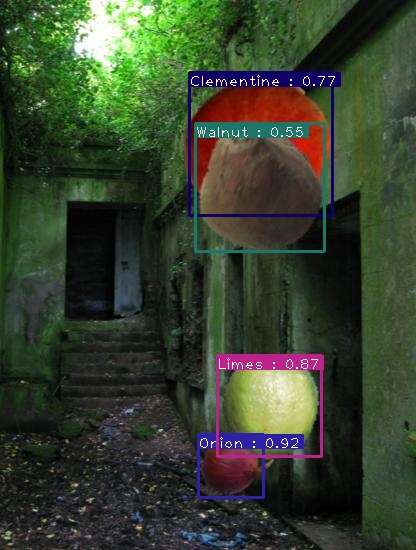

In [39]:
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:

print(data['annotations'][1])

In [40]:
import json
with open('valid/_annotations.coco.json') as json_file:
    validData = json.load(json_file)

In [41]:
from collections import defaultdict
validationDictionary = {}
for annotation in validData['annotations']:
  if annotation['image_id'] in validationDictionary:
    validationDictionary[annotation['image_id']]['fruits'].append(annotation['category_id'])
    validationDictionary[annotation['image_id']]['bbox'].append(annotation['bbox'])
  else:
    validationDictionary[annotation['image_id']] = {}
    validationDictionary[annotation['image_id']] = defaultdict(list)
    validationDictionary[annotation['image_id']] = defaultdict(list)
    validationDictionary[annotation['image_id']]['fruits'].append(annotation['category_id'])
    validationDictionary[annotation['image_id']]['bbox'].append(annotation['bbox'])

In [ ]:
print(validationDictionary)

In [ ]:
print(class_list[44])

In [42]:
from os import listdir
from os.path import isfile, join
mypath = 'valid/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)

['13_jpg.rf.01080db227526535f9b4dc55faf66215.jpg', '158_jpg.rf.a1d0a1e2adf016b5ab1a737e57be8fe2.jpg', '903_jpg.rf.90767e6b8a02a6168f9e998169295053.jpg', '416_jpg.rf.40d5dfce3644f506060b6ad3530933ab.jpg', '381_jpg.rf.a65708c00b4345296d0d874dcd12fe8d.jpg', '84_jpg.rf.181790f4dd02c0d861e25260155d05c1.jpg', '988_jpg.rf.7f1713926a7f0fbd454b1e269a37b055.jpg', '928_jpg.rf.15397e33e045e14b8e57ea6ae132a7eb.jpg', '267_jpg.rf.57b94caa09fd17e7c48b03d211a9087a.jpg', '129_jpg.rf.27a01117dba1db3550b25e9963c4e9e8.jpg', '226_jpg.rf.e1a68a66b8d920c94aeeda5278240ecf.jpg', '273_jpg.rf.98454589fafbc198ed4907a02e7504d5.jpg', '942_jpg.rf.7137640757d62d2441853edddc6c1e04.jpg', '299_jpg.rf.b0386d5ce694ecb048c2b48f130657fb.jpg', '723_jpg.rf.5643f01eb075b10974334c1bc1189741.jpg', '771_jpg.rf.1da0b653bc6ebc91ff6d9381e6f7e6bb.jpg', '60_jpg.rf.7f882f15d1f4aebdacf172d3416548b4.jpg', '850_jpg.rf.318a0d2c46b368fb2cb15a393517402e.jpg', '329_jpg.rf.d6ad3a9dd69d14e2297f10c2f08410d5.jpg', '338_jpg.rf.afad75f2519793d99fd11

In [43]:
print(validData['images'])
fruitsTotal = 0
correctTotal = 0
for image in validData['images']:
  fruitId = image['id']
  fruitFilename = image['file_name']
  fruitsInPicture = validationDictionary[fruitId]['fruits']
  fruitsTotal += len(fruitsInPicture)
  img_path = "valid/" + fruitFilename;
  duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
  predictedFruitIndexes = np.argwhere(scores.cpu() >= 0.2)
  for idx in predictedFruitIndexes[0]:
    if labels[idx] in fruitsInPicture:
      correctTotal += 1

print(fruitsTotal)
print(correctTotal)

print(correctTotal / fruitsTotal)



[{'id': 0, 'license': 1, 'file_name': '78_jpg.rf.0029035f1f3486108af0338adab7106c.jpg', 'height': 550, 'width': 416, 'date_captured': '2020-04-23T01:57:46+00:00'}, {'id': 1, 'license': 1, 'file_name': '501_jpg.rf.009e808ef289203c1e114da64ed2adef.jpg', 'height': 550, 'width': 416, 'date_captured': '2020-04-23T01:57:46+00:00'}, {'id': 2, 'license': 1, 'file_name': '465_jpg.rf.005d268ff4e9cc76e257a9da74c2d05b.jpg', 'height': 550, 'width': 416, 'date_captured': '2020-04-23T01:57:46+00:00'}, {'id': 3, 'license': 1, 'file_name': '13_jpg.rf.01080db227526535f9b4dc55faf66215.jpg', 'height': 550, 'width': 416, 'date_captured': '2020-04-23T01:57:46+00:00'}, {'id': 4, 'license': 1, 'file_name': '322_jpg.rf.00a4dcd1a49717e05e28626c04c71d03.jpg', 'height': 550, 'width': 416, 'date_captured': '2020-04-23T01:57:46+00:00'}, {'id': 5, 'license': 1, 'file_name': '671_jpg.rf.03054b6f7deb68866e6b718af9025aed.jpg', 'height': 550, 'width': 416, 'date_captured': '2020-04-23T01:57:46+00:00'}, {'id': 6, 'licens

In [46]:
!ls

'apple_apricot_nectarine_peach_peach(flat)_pomegranate_pear_plum.jpg'
 drive
 Fruits
 Inference
 Monk_Object_Detection
 output.jpg
 README.dataset.txt
 README.roboflow.txt
 sample_data
 tensorboard
 train
 trained
 trained_export
 valid


In [55]:
# apple_apricot_nectarine_peach_peach(flat)_pomegranate_pear_plum.jpg
!cp '/content/drive/My Drive/IMG_3.JPG' 'IMG_3.JPG'

In [56]:
%%time
#bang!
img_path = "IMG_3.JPG";
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

Done. (0.044s)
CPU times: user 92.4 ms, sys: 12.2 ms, total: 105 ms
Wall time: 103 ms


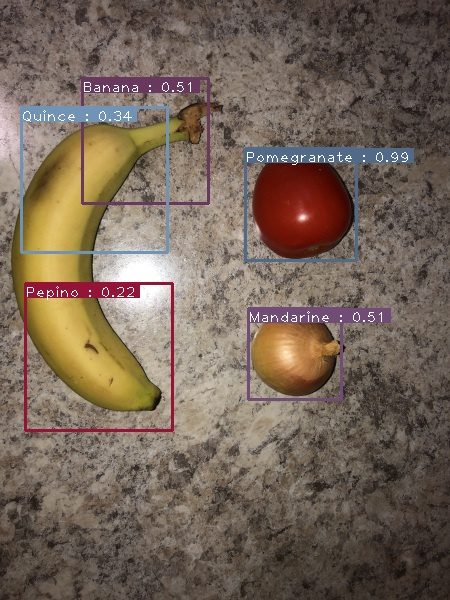

In [57]:
from IPython.display import Image
Image(filename='output.jpg') 

In [66]:
!cp '/content/drive/My Drive/IMG_1.jpg' 'IMG_1.jpg'

In [69]:
%%time
#bang!
img_path = "IMG_1.jpg";
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.3);


Done. (0.046s)
CPU times: user 103 ms, sys: 5.9 ms, total: 109 ms
Wall time: 107 ms


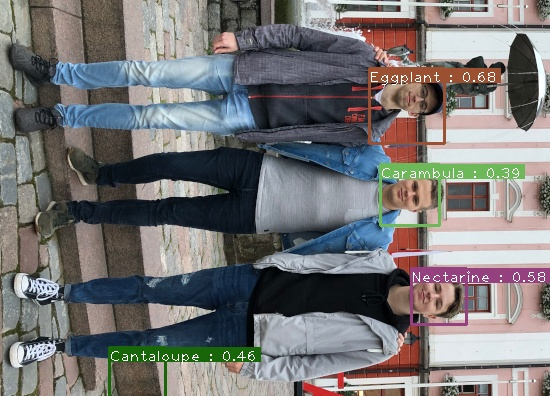

In [70]:
from IPython.display import Image
Image(filename='output.jpg') 